# Modélisation de données spatiales

## Deux types de données spatiales

### Raster
(cf. pixels d'une image 2d)

### Représentation vectorielle
Formes géométriques définies par des coordonnées dans un repère.

## Formes géométriques


### Types
Implémentées efficacement par [Shapely](https://github.com/Toblerity/Shapely), pour manipuler :
* [Point](https://shapely.readthedocs.io/en/latest/manual.html#points) : un point défini par ses coordonnées en 2 (ou 3) dimensions
* [LineString](https://shapely.readthedocs.io/en/latest/manual.html#LineString) : un trajet défini par une suite de `Point`
* [Polygon](https://shapely.readthedocs.io/en/latest/manual.html#Polygon) : un polygone qui peut être troué

Et des collections (`Multi…`) de ces formes.

### Opérations
Des opérations performantes peuvent être réalisées sur/entre des collections de formes géométriques (test d'inclusion, intersections, union,…)

# Geopandas
* [GeoDataFrame](http://geopandas.org/reference/geopandas.GeoDataFrame.html) : comme une `DataFrame`, avec en plus une colonne `gemoetry` de type `GeoSeries`
* [GeoSeries](http://geopandas.org/data_structures.html#geoseries) : une `Series` contenant des formes de `Shapely`. Les fonctions/méthodes appelées sur une `GeoSeries` sont des versions *vectorisées* (appliqu sur chacun des éléments) des fonctions/méthodes de `Shapely`.

# Systèmes de références des coordonnées

Un [CRS](http://geopandas.org/projections.html#coordinate-reference-systems) est nécessaire pour :
* représenter des données géolocalisées
* calculer des distances / aires

Aucun système de projection sphère → 2d n'est parfait et il y a [plusieurs (!)](https://spatialreference.org/ref/epsg/) compromis définis par :
* la préservation des distances
* la préservation des aires
* l'endroit de la sphère où les distorsions sont minimales

Cf. standards de l'European Petroleum Survey Group (epsg)

# Formats de fichiers

N'importe quel fichier `csv` peut contenir :
* une colonne `latitude` et un colonne `longitude`
* une colonne avec un couple `latitude, longitude`
* une colonne avec des coordonnées de points formant une `LineString` ou un `Polygon`

Il est alors possible de construire la `GeoSeries` à partir de ces informations et de crée une `GeoDataFrame` à partir de la `DataFrame` et de cette `GeoSeries`.

Mais il y a aussi des formats de fichiers spécifiques, comme :
* *Shapefile* (extension `.shp` avec avec plusieurs fichiers de même nom avec différentes extensions, ou mieux, un `.zip` regroupant ces fichiers)
* *GeoJSON*

`Geopandas` utilise [Fiona](https://fiona.readthedocs.io/en/latest/) pour lire / écrire ces fichiers.

On peut construire des formes comme n'importe quel objet, après avoir importé les classes nécessaires:

In [1]:
from shapely.geometry import Point, LineString, Polygon
p_0= Point(0,1)
road=LineString([Point(0,0),Point(0,1),Point(1,1), Point(0.5,-1)])

Le notebook jupyter sait représenter les formes de `Shapely`:

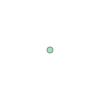

In [2]:
p_0

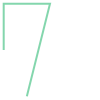

In [3]:
road

On peut tester si une forme en contient une autre. Attention les extrémités des `LineString` ne sont pas contenues dans ces dernières.

In [4]:
road.contains(p_0)

True

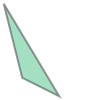

In [5]:
polygon_1 = Polygon([(0,5), (1,1), (3,0)])
polygon_1

In [6]:
polygon_1.distance(p_0)

0.9701425001453319

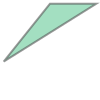

In [7]:
polygon_2= Polygon([(5,5), (1,5), (-3,0)])
polygon_2

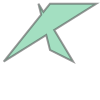

In [8]:
polygon_1.union(polygon_2)

In [9]:
import numpy as np
import pandas as pd
import geopandas as gpd

On peut construire une `GeoSeries` à partir de formes :

In [10]:
s = gpd.GeoSeries([Point(1, 1),LineString([(0, 0), (1, 1)]),  Point(3, 3)])
s

0                          POINT (1.00000 1.00000)
1    LINESTRING (0.00000 0.00000, 1.00000 1.00000)
2                          POINT (3.00000 3.00000)
dtype: geometry

Les `GeoSeries` ont une méthode `plot` :

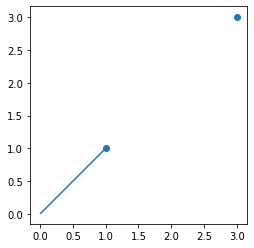

In [11]:
s.plot()

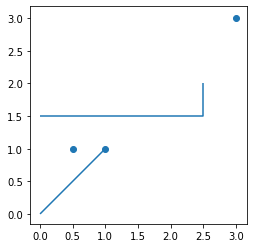

In [12]:
s = gpd.GeoSeries([Point(1, 1),LineString([(0, 0), (1, 1)]), Point(0.5, 1),
                   LineString([(0.,1.5),(2.5,1.5),(2.5,2.0)]), Point(3, 3)])
s.plot()

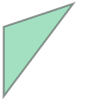

In [13]:
crop = Polygon([(0.25, 0.5), (0.25,1.25),(1,1.5)])
crop

Les méthodes `Shapely` vectorisées sur une `GeoSeries` retournent une `Series` de booléens qui peut être utilisée pour indexer : 

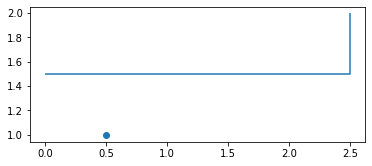

In [14]:
s.loc[s.intersects(crop)].plot()

In [15]:
from shapely.geometry import Point,LineString
s = gpd.GeoSeries([Point(1, 1),LineString([(0, 0), (1, 1)]),  Point(3, 3)])

In [16]:
s

0                          POINT (1.00000 1.00000)
1    LINESTRING (0.00000 0.00000, 1.00000 1.00000)
2                          POINT (3.00000 3.00000)
dtype: geometry

Pandas met à disposition des jeux de données, notamment un avec des pays et un avec des villes.

In [17]:
import geopandas.datasets
geopandas.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [19]:
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

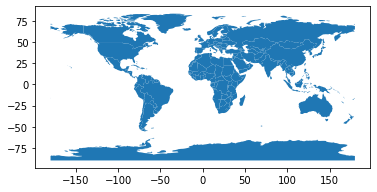

In [20]:
world.plot()

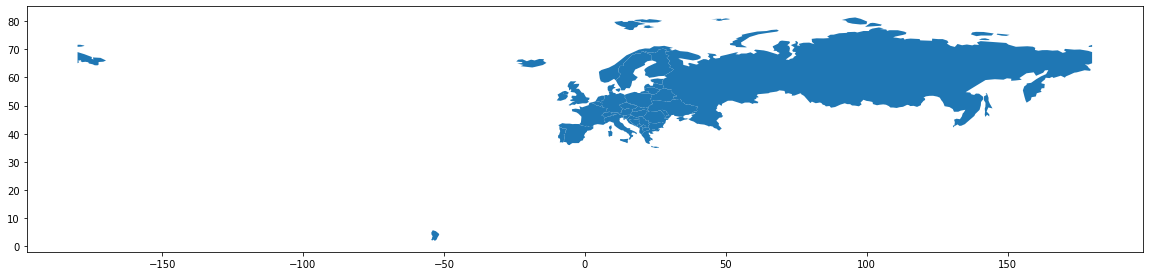

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 20))
world.loc[world['continent']=='Europe'].plot(ax=ax)

In [22]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities

name                     geometry
0    Vatican City    POINT (12.45339 41.90328)
1      San Marino    POINT (12.44177 43.93610)
2           Vaduz     POINT (9.51667 47.13372)
3      Luxembourg     POINT (6.13000 49.61166)
4         Palikir    POINT (158.14997 6.91664)
..            ...                          ...
197         Cairo    POINT (31.24802 30.05191)
198         Tokyo   POINT (139.74946 35.68696)
199         Paris     POINT (2.33139 48.86864)
200      Santiago  POINT (-70.66899 -33.44807)
201     Singapore    POINT (103.85387 1.29498)

[202 rows x 2 columns]

**Attention !** Les distances n'ont de sens qu'avec un CRS adapté :

In [23]:
# Distance entre Luxembourg et Paris ?
cities.iloc[3]['geometry'].distance(cities.iloc[199]['geometry'])

3.8706000028599097

In [24]:
cities.crs

{'init': 'epsg:4326'}

In [25]:
cities_reproj= cities.to_crs(epsg=2154)

In [26]:
cities_reproj.iloc[3]['geometry'].distance(cities_reproj.iloc[199]['geometry'])

288715.49662890146

On peut superposer des affichages de `Geopandas` en passant l'argument `ax` aux méthodes `plot` :

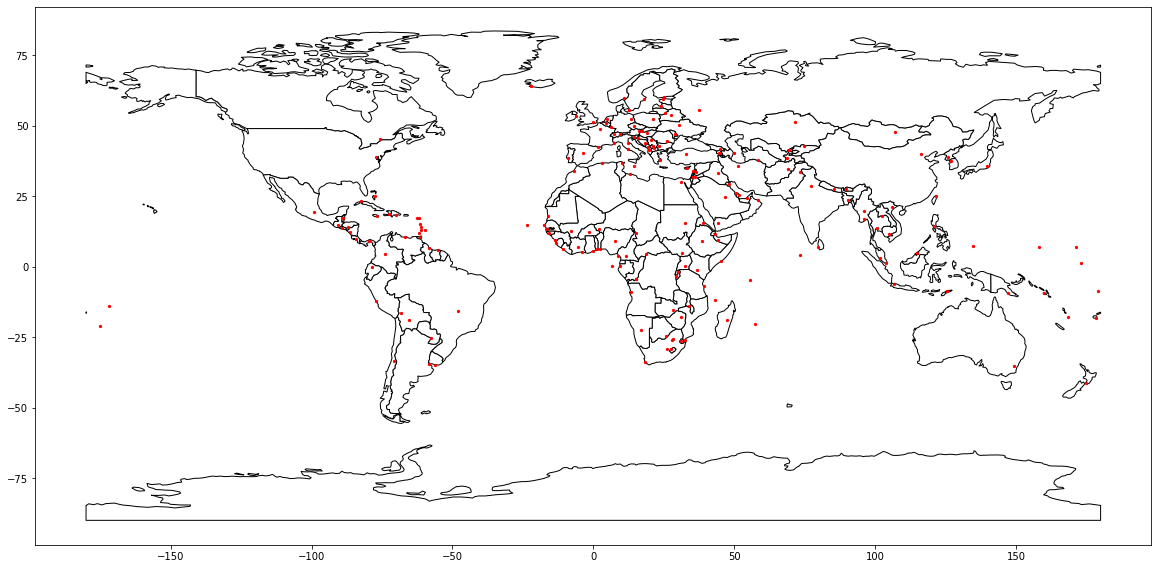

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker='o', color='red', markersize=5)

On peut charger un fichier *csv* avec des colonnes `latitude` et `longitude` pour en faire une `GeoDataFrame` en le chargeant d'abord comme une `DataFrame` normale

In [28]:
more_cities=pd.read_csv("./Data/World/worldcities.csv")

In [29]:
more_cities

city   city_ascii      lat       lng        country iso2 iso3  \
0            Tokyo        Tokyo  35.6850  139.7514          Japan   JP  JPN   
1         New York     New York  40.6943  -73.9249  United States   US  USA   
2      Mexico City  Mexico City  19.4424  -99.1310         Mexico   MX  MEX   
3           Mumbai       Mumbai  19.0170   72.8570          India   IN  IND   
4        São Paulo    Sao Paulo -23.5587  -46.6250         Brazil   BR  BRA   
...            ...          ...      ...       ...            ...  ...  ...   
15488  Timmiarmiut  Timmiarmiut  62.5333  -42.2167      Greenland   GL  GRL   
15489  Cheremoshna  Cheremoshna  51.3894   30.0989        Ukraine   UA  UKR   
15490    Ambarchik    Ambarchik  69.6510  162.3336         Russia   RU  RUS   
15491      Nordvik      Nordvik  74.0165  111.5100         Russia   RU  RUS   
15492      Ennadai      Ennadai  61.1333 -100.8833         Canada   CA  CAN   

               admin_name  capital  population          id  
0                   Tōkyō  primary  35676000.0  1392685764  
1                New York      NaN  19354922.0  1840034016  
2        Ciudad de México  primary  19028000.0  1484247881  
3             Mahārāshtra    admin  18978000.0  1356226629  
4               São Paulo    admin  18845000.0  1076532519  
...                   ...      ...         ...         ...  
15488            Kujalleq      NaN        10.0  1304206491  
15489   Kyyivs’ka Oblast’      NaN         0.0  1804043438  
15490    Sakha (Yakutiya)      NaN         0.0  1643739159  
15491  Krasnoyarskiy Kray      NaN         0.0  1643587468  
15492             Nunavut      NaN         0.0  1124019423  

[15493 rows x 11 columns]

Pour chaque paire de coordonnées, on crée une instance de `Point` que l'on stocke dans une liste :

In [30]:
geometry= [Point(x,y) for x,y in zip(more_cities['lng'], more_cities['lat'])]
geometry

 ...]

On peut ensuite créer la `GeoDataFrame` à partir de la `DataFrame` et de la liste de `Point` correspondante :

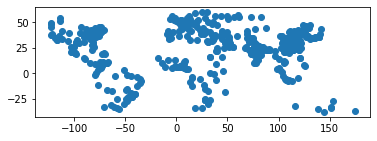

In [31]:
geo_more_cities=gpd.GeoDataFrame(more_cities, geometry=geometry, crs={'init': 'epsg:4326' })
geo_more_cities.loc[geo_more_cities['population']>1000000].plot()

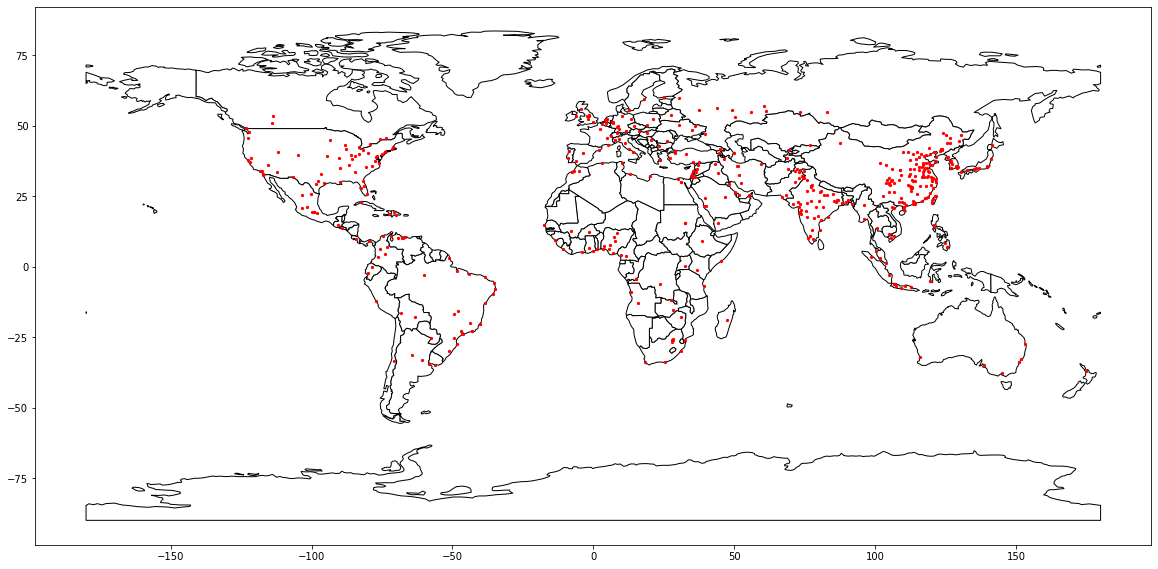

In [32]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='black')
geo_more_cities.loc[geo_more_cities['population']>1000000].plot(ax=ax, marker='o', color='red', markersize=5)

Sous réserve d'utiliser une projection adaptée, on peut utiliser la bibliothèque `contextily` pour ajouter un fond de carte.

In [33]:
import contextily

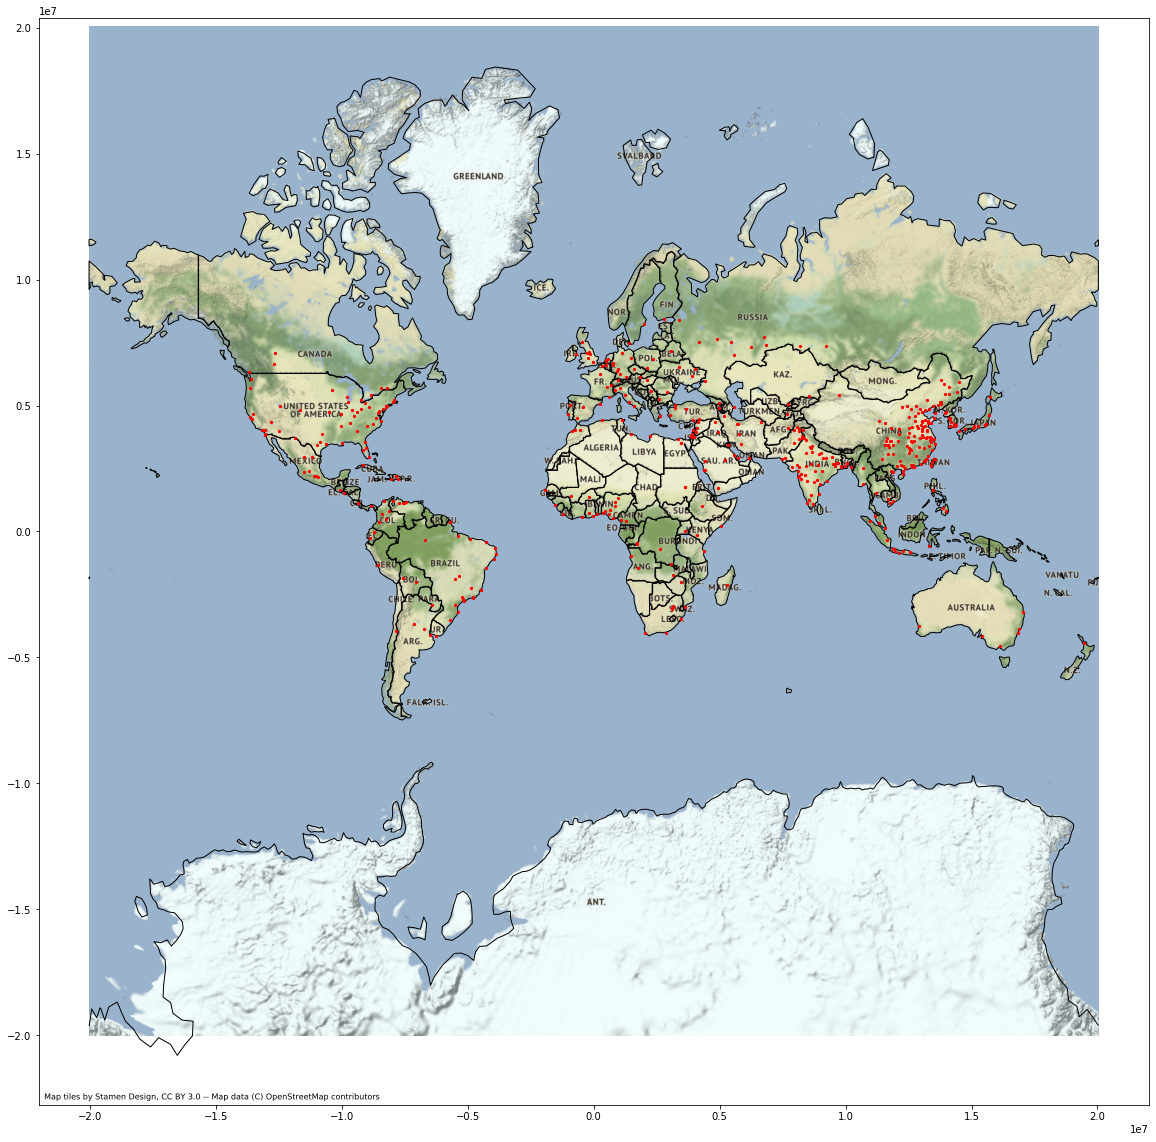

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')
world.to_crs(epsg=3857).plot(ax=ax, facecolor="none", edgecolor='black')
geo_more_cities.to_crs(epsg=3857).loc[geo_more_cities['population']>1000000].plot(ax=ax, marker='o', color='red', markersize=5)
contextily.add_basemap(ax)